## Web Game Chrome Dino

### Step 1

#### Install Dependencies

In [1]:
!pip list

Package                    Version
-------------------------- ------------
agate                      1.7.1
altgraph                   0.17.4
annotated-types            0.6.0
anyio                      4.0.0
argon2-cffi                23.1.0
argon2-cffi-bindings       21.2.0
arrow                      1.3.0
asn1crypto                 1.5.1
asttokens                  2.4.0
async-lru                  2.0.4
attrs                      23.1.0
Automat                    22.10.0
Babel                      2.13.0
backcall                   0.2.0
bcrypt                     4.1.2
beautifulsoup4             4.12.2
bleach                     6.1.0
boto3                      1.34.43
botocore                   1.34.43
certifi                    2023.7.22
cffi                       1.16.0
charset-normalizer         3.3.0
chess                      1.10.0
click                      8.1.7
cloudpickle                3.0.0
colorama                   0.4.6
comm                       0.1.4
constantly      

In [1]:
from mss import mss # screen capture
from pywinauto.application import Application # sending commands
from pywinauto import mouse, keyboard # mouse clicks
import cv2 # image processing
import numpy as np # Transformational Framework
import pytesseract # OCR for game over detection 
from matplotlib import pyplot as plt # visualize captured frames
import time # time or pauses 
from gymnasium import Env # gym environment
from gymnasium.spaces import Box, Discrete # gym spaces

pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
app = Application().connect(title_re=".*Doodle Jump*")

### Step 2

#### Build Environment

In [2]:
"""
    The `WebGame` class inherits from `Env` and implements methods for interacting with a web-based game environment:
    
    - __init__(self): Initializes the environment, setting up observation and action spaces, and capturing game frames.
    
    - seed(self, seed=None): Seeds the environment (not implemented).
    
    - step(self, action): Executes an action in the game environment, such as moving left, right, or performing a no-operation.
    
    - reset(self, seed=None): Resets the game environment, optionally seeding it with a specific value.
    
    - render(self): Displays the current game frame visualization using OpenCV. Pressing 'q' closes the visualization window.
    
    - close(self): Closes the game environment by destroying any OpenCV windows.
    
    - get_observation(self): Retrieves the observation part of the game, capturing and preprocessing game frames.
    
    - get_done(self): Determines whether the game has ended based on captured frames, returning a boolean indicating game completion.
"""


class WebGame(Env):
    def __init__(self):
        super().__init__()
        # Setup spaces
        self.observation_space = Box(low=0, high=255, shape=(1,83,100), dtype=np.uint8)
        self.action_space = Discrete(3)
        # Capture game frames
        self.cap = mss()
        self.game_location = {'top': 300, 'left': 630, 'width': 660, 'height': 500}
        # self.done_location = {'top': 700, 'left': 1000, 'width': 660, 'height': 200}
        self.done_location = {'top': 290, 'left': 630, 'width': 660, 'height': 200}
    
    def seed(self, seed=None):
        pass
        
    def step(self, action):
        action_map = {
                        0: '{LEFT 25}',
                        1: '{RIGHT 25}',
                        2: 'no_op',
                        3: '{SPACE}'
                    }
        if action != 2:  # For actions other than 'SPACE'
            app.top_window().set_focus()
            app.top_window().send_keystrokes(action_map[action])  # Key press
        elif action == 3:
            app.top_window().set_focus()
            app.top_window().send_keystrokes(action_map[action])
            time.sleep(0.5)
            app.top_window().send_keystrokes(action_map[action]) 

        done, done_cap, dwn = self.get_done() 
        observation = self.get_observation()
        reward = 1 
        info = {}
        truncated = False
        return observation, reward, done, dwn, truncated, info
    
    def reset(self, seed=None):
        time.sleep(1)
        app.top_window().set_focus()
        pywinauto.mouse.click(button='left', coords=(1000, 715))
    
        if seed is not None:
            self.seed(seed)
        info = {}
        return self.get_observation(), info
        
    def render(self):
        cv2.imshow('Game', self.current_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            self.close()
         
    def close(self):
        cv2.destroyAllWindows()
    
    def get_observation(self):
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3].astype(np.uint8)
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (100,83))
        channel = np.reshape(resized, (1,83,100))
        return channel
    
    def get_done(self):
        done_cap = np.array(self.cap.grab(self.done_location))
        done_strings = ['game', 'gaje', 'qaah', 'GARH']
        dwn_strings = ['Wank', 'wank', 'Want', 'want']
        done=False
        # if np.sum(done_cap) < 44300000:
        #     done = True
        # done = False
        res = pytesseract.image_to_string(done_cap)[:4]
        if res in done_strings:
            done = True
        if res in dwn_strings:
            app.top_window().set_focus()
            pywinauto.mouse.click(button='left', coords=(1080, 700))
            
        return done, done_cap, 

#### Test Environment

In [3]:
env =  WebGame()

In [4]:
obs = env.get_observation()

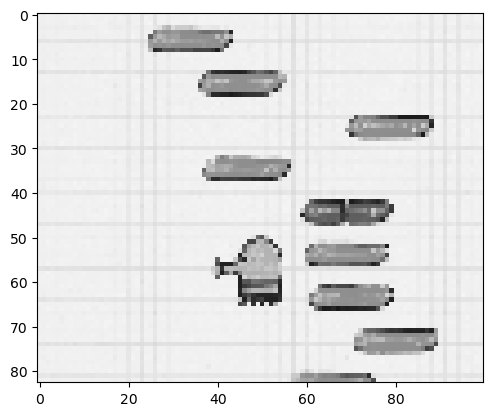

In [5]:
plt.imshow(cv2.cvtColor(obs[0], cv2.COLOR_GRAY2RGB))

In [90]:
done, done_cap, dwm = env.get_done()

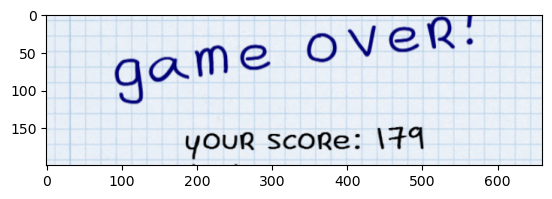

In [91]:
plt.imshow(done_cap)

In [92]:
pytesseract.image_to_string(done_cap)[:4]

'game'

In [93]:
done

True

In [153]:
for episode in range(10): 
    obs = env.reset()
    done = False 
    total_reward   = 0
    while (not done) and (not dwn): 
        obs, reward,  done, truncated, info =  env.step(env.action_space.sample())
        total_reward  += reward
    print('Total Reward for episode {} is {}'.format(episode, total_reward)) 

Total Reward for episode 0 is 13
Total Reward for episode 1 is 25
Total Reward for episode 2 is 18
Total Reward for episode 3 is 18
Total Reward for episode 4 is 32
Total Reward for episode 5 is 17
Total Reward for episode 6 is 31
Total Reward for episode 7 is 47
Total Reward for episode 8 is 15
Total Reward for episode 9 is 18


### Step 3

#### Train Model

##### Create Callback

In [6]:
# Import os for file path management
import os 
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback
# Check Environment    
from stable_baselines3.common import env_checker

In [41]:
env_checker.check_env(env)

In [7]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [8]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [9]:
callback = TrainAndLoggingCallback(check_freq=1000, save_path=CHECKPOINT_DIR)

##### Build DQN

In [10]:
from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack

In [11]:
env = WebGame()

In [ ]:
model = DQN('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, buffer_size=1200000, learning_starts=1000)


In [ ]:
model.learn(total_timesteps=10000, callback=callback)

In [ ]:
model.load('train_first/best_mode l_50000') 

### Step 4

#### Test Model

In [ ]:
for episode in range(5): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(int(action))
        time.sleep(0.01)
        total_reward += reward
    print('Total Reward for episode {} is {}'.format(episode, total_reward))
    time.sleep(2)